## Micrograd tutorial by karpathy.ai

In [41]:
!pip install -Uqq micrograd numpy matplotlib graphviz

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Jugando con derivadas

In [8]:
def f(x):
    return 3*x**2 - 4*x + 5

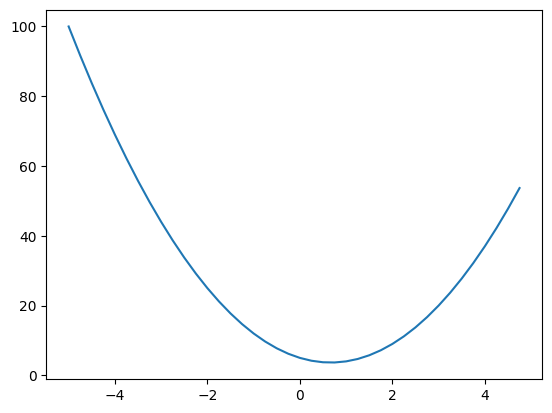

In [9]:
xs = np.arange(-5, 5, .25)
ys = f(xs)
plt.plot(xs, ys)

## Construyendo el `Value` de micrograd

In [56]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [57]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [62]:
a = Value(2., label='a')
b = Value(-3., label='b')
c = Value(10., label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2., label='f')
L = f * d; L.label = 'L'

backpropagation es una aplicacion recursiva de la regla de la cadena (derivada de composicion de funciones), a travez del DAG

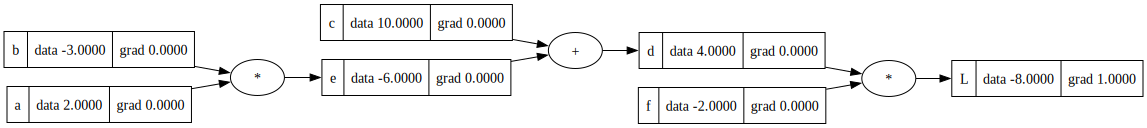

In [61]:
# implementing backprop
L.grad = 1

draw_dot(L)

## programando una neuron

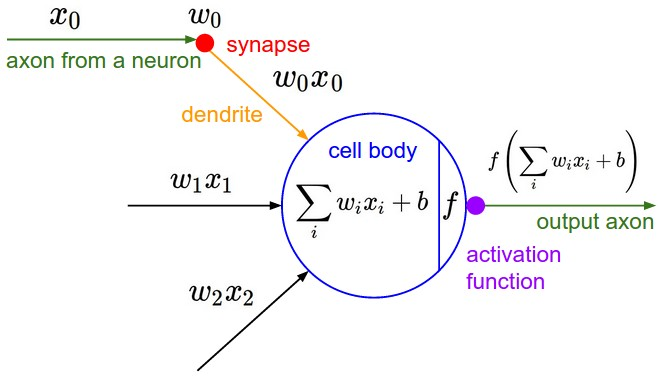